In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
iris = sns.load_dataset('iris')

import warnings
warnings.filterwarnings('ignore')

C:\Users\vbnmz\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vbnmz\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vbnmz\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vbnmz\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
target = iris["species"]
X = iris.drop(columns=['species'])

In [3]:
le = LabelEncoder()
#target = pd.Series(le.fit_transform(target), name='species')
target = le.fit_transform(target)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,target, random_state=417)

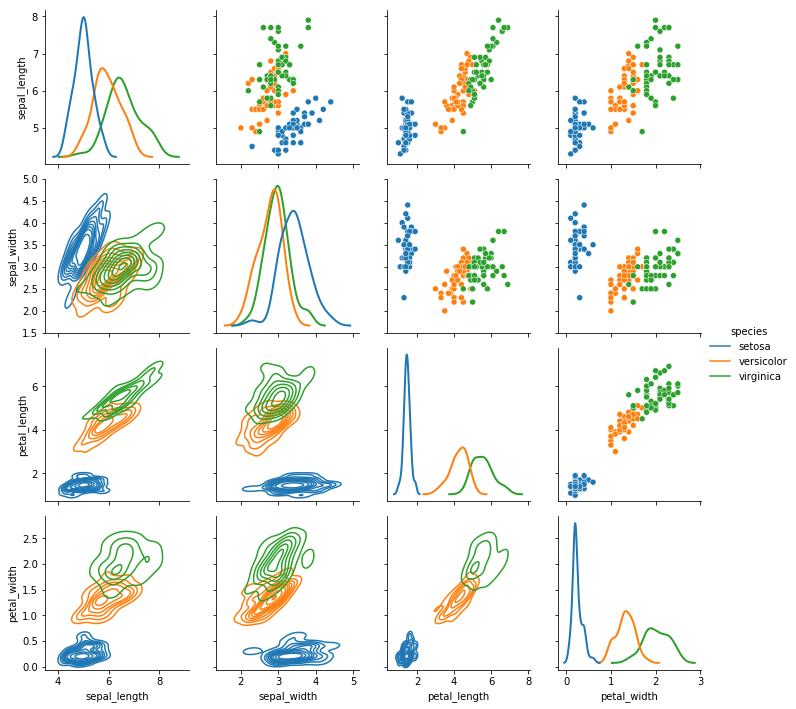

In [5]:
g = sns.PairGrid(iris, diag_sharey=False, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
g.add_legend()

In [6]:
model = Sequential()
model.add(Dense(4, input_dim=4))
model.add(Dense(30, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

W0309 21:58:13.637114 25500 deprecation.py:506] From C:\Users\vbnmz\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#model.fit(X_train, y_train, epochs=100, batch_size=1)

In [9]:
#loss, mse = model.evaluate(X_test, y_test, batch_size=1)
#print(f'loss:{loss}\nmse:{mse}')

In [10]:
#pred = model.predict(X_test)

In [11]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 112 samples, validate on 38 samples
Epoch 1/100
112/112 [==============================] - 0s 1ms/sample - loss: 1.1541 - acc: 0.3482 - val_loss: 1.1948 - val_acc: 0.2895
Epoch 2/100
112/112 [==============================] - 0s 89us/sample - loss: 1.0808 - acc: 0.3661 - val_loss: 1.1282 - val_acc: 0.4737
Epoch 3/100
112/112 [==============================] - 0s 107us/sample - loss: 1.0394 - acc: 0.6071 - val_loss: 1.0768 - val_acc: 0.5526
Epoch 4/100
112/112 [==============================] - 0s 125us/sample - loss: 1.0046 - acc: 0.6875 - val_loss: 1.0362 - val_acc: 0.5789
Epoch 5/100
112/112 [==============================] - 0s 116us/sample - loss: 0.9761 - acc: 0.6964 - val_loss: 1.0015 - val_acc: 0.5789
Epoch 6/100
112/112 [==============================] - 0s 116us/sample - loss: 0.9477 - acc: 0.6964 - val_loss: 0.9738 - val_acc: 0.5789
Epoch 7/100
112/112 [==============================] - 0s 107us/sample - loss: 0.9226 - acc: 0.6964 - val_loss: 0.9497 - val_acc: 0.5789

112/112 [==============================] - 0s 98us/sample - loss: 0.2668 - acc: 0.9464 - val_loss: 0.3268 - val_acc: 0.8684
Epoch 61/100
112/112 [==============================] - 0s 80us/sample - loss: 0.2622 - acc: 0.9464 - val_loss: 0.3313 - val_acc: 0.8684
Epoch 62/100
112/112 [==============================] - 0s 71us/sample - loss: 0.2575 - acc: 0.9554 - val_loss: 0.3336 - val_acc: 0.8684
Epoch 63/100
112/112 [==============================] - 0s 71us/sample - loss: 0.2544 - acc: 0.9464 - val_loss: 0.3245 - val_acc: 0.8684
Epoch 64/100
112/112 [==============================] - 0s 89us/sample - loss: 0.2477 - acc: 0.9554 - val_loss: 0.3214 - val_acc: 0.8684
Epoch 65/100
112/112 [==============================] - 0s 71us/sample - loss: 0.2439 - acc: 0.9554 - val_loss: 0.3127 - val_acc: 0.8684
Epoch 66/100
112/112 [==============================] - 0s 71us/sample - loss: 0.2434 - acc: 0.9464 - val_loss: 0.3058 - val_acc: 0.8684
Epoch 67/100
112/112 [==============================] 

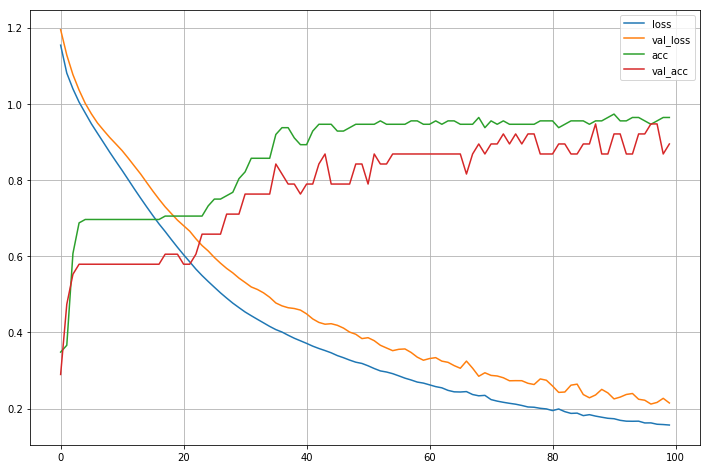

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [14]:
pred = model.predict(X_test)